In [1]:
#Importamos todas las librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import plotly
import plotly.express as px
from matplotlib import style
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression


In [2]:
# Funcion para calcular la distancia entre dos puntos a través de la función haversine,
# esto nos permite convertir coordenadas en unidades de distancia
from math import radians, cos, sin, asin, sqrt
def DistanciaGPS (lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convertimos grados decimales en radianes
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # Se utiliza la formula Haversine
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

# Importa
from google.colab import drive 
drive.mount('/content/gdrive')

import pandas as pd 
df=pd.ExcelFile('TFM DATABASE.xlsx')


In [3]:
df=pd.ExcelFile('TFM DATABASE.xlsx')
df1 = pd.read_excel(df,'GPS - Enero 2020', na_values='?')
df1.head()

,Fec. Prod,Doc. Transporte,WERKS,FECHA_DESP,KUNNR,IDEOBRA,MATNR,FORMULA,ID_ESTRUC,ID_MODALIDAD,...,T.Proceso,T.Traslado,T.Espera,T.Descarga,T.Retorno,TTOTAL,Dia,Fecha_DiaSem,FinSemana,FinMes
0,2020-01-02 07:13:00,1826870,1209,02.01.2020,50007386,9000031161,004-01606,C210-MS-H57-A4,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,jueves,5,0,0
1,2020-01-02 10:47:00,1826962,1209,02.01.2020,50100921,9000042078,004-02808,M1:5-I-A5,18,2,...,21.0,14.0,NaN,NaN,93.0,128.0,jueves,5,0,0
2,2020-01-02 11:02:00,1826968,1219,02.01.2020,39760908,9000042681,004-01767,C175-I-H57-A5,20,1,...,24.0,1222.0,NaN,NaN,26.0,1272.0,jueves,5,0,0
3,2020-01-02 11:07:00,1826969,1213,02.01.2020,11402283,9000042938,004-01624,C210-MS-H67-A5,11,2,...,NaN,21.0,25.0,17.0,18.0,81.0,jueves,5,0,0
4,2020-01-02 11:22:00,1826979,1217,02.01.2020,39760908,9000041680,004-01624,C210-MS-H67-A5,10,2,...,NaN,17.0,22.0,3.0,17.0,59.0,jueves,5,0,0


In [4]:
df1.isnull().sum()
    

Fec. Prod                            0
Doc. Transporte                      0
WERKS                                0
FECHA_DESP                           0
KUNNR                                0
IDEOBRA                              0
MATNR                                0
FORMULA                              0
ID_ESTRUC                            0
ID_MODALIDAD                         0
VBELN_PED                            0
VBELN_ENTREGA                        0
WERK LON                             0
WERK LAT                             0
OBRA LAT                             2
OBRA LON                             2
DES_ESTRUCTURA                     116
Estado                             167
Placa                                0
Cliente                              0
Descripción de Obra                  0
Pto. Exped                           0
V. Entregado                         0
H. Program                           0
Tiempo de Proceso 1               1234
Tiempo de Proceso 2      

In [5]:
pd.isnull(np.array([np.nan, 0], dtype=float))

array([ True, False])

In [6]:
#Funcion Dummy
#Data Transformation With Functions 1)Dummy para Plant 2)Dummy Para Estrutura 3)Dummy para modalidad 4)Aplicar Funcion de Distancia 5)Dummy para el dia de la semana

def dummy_convert (df,ID_ESTRUC):

    estruturas = pd.get_dummies(df[ID_ESTRUC], prefix = ID_ESTRUC)
    df = pd.concat([df, estruturas], axis = 1)

    return df




In [7]:
# df1 = pd.read_excel(df,'GPS - Enero 2020')
df1.describe()

,Doc. Transporte,WERKS,KUNNR,IDEOBRA,ID_ESTRUC,ID_MODALIDAD,VBELN_PED,VBELN_ENTREGA,WERK LON,WERK LAT,...,V. Entregado,T.Proceso,T.Traslado,T.Espera,T.Descarga,T.Retorno,TTOTAL,Fecha_DiaSem,FinSemana,FinMes
count,5.865000e+03,5865.000000,5.865000e+03,5.865000e+03,5865.000000,5865.000000,5.865000e+03,5.865000e+03,5865.000000,5865.000000,...,5865.000000,4424.000000,5170.000000,4077.000000,4213.000000,5184.000000,5864.000000,5865.000000,5865.000000,5865.000000
mean,1.835786e+06,1418.126343,3.346716e+08,9.000038e+09,14.260870,2.855925,2.004224e+08,2.001395e+09,-6.674300,-79.665294,...,6.887758,27.767857,41.785300,22.105224,45.662473,41.060185,142.262960,4.630009,0.158227,0.044331
std,5.189307e+03,875.928047,6.621355e+08,5.748341e+03,9.891696,4.401206,2.535832e+03,3.381704e+03,1.440436,1.178087,...,1.539636,45.588712,102.354334,25.438499,41.515441,57.006668,140.120312,1.655488,0.364985,0.205847
min,1.826870e+06,1203.000000,1.001540e+07,9.000002e+09,1.000000,1.000000,2.003542e+08,2.001389e+09,-9.103467,-81.274960,...,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.831157e+06,1203.000000,2.537579e+07,9.000034e+09,8.000000,1.000000,2.004214e+08,2.001392e+09,-8.138488,-80.718861,...,6.000000,18.000000,11.000000,5.000000,19.000000,11.000000,77.000000,3.000000,0.000000,0.000000
50%,1.835803e+06,1213.000000,5.000710e+07,9.000039e+09,11.000000,2.000000,2.004225e+08,2.001395e+09,-6.779977,-79.880310,...,8.000000,23.000000,24.000000,13.000000,34.000000,24.000000,124.000000,5.000000,0.000000,0.000000
75%,1.840167e+06,1219.000000,5.010092e+07,9.000042e+09,16.000000,2.000000,2.004235e+08,2.001398e+09,-5.164840,-79.010054,...,8.000000,29.000000,42.000000,28.000000,59.000000,49.000000,180.000000,6.000000,0.000000,0.000000
max,1.844886e+06,5212.000000,1.900002e+09,9.000044e+09,50.000000,21.000000,2.004248e+08,2.001401e+09,-4.599295,-76.339073,...,9.500000,1319.000000,1428.000000,192.000000,1119.000000,1369.000000,2083.000000,7.000000,1.000000,1.000000


In [8]:
df1.columns

Index(['Fec. Prod', 'Doc. Transporte', 'WERKS', 'FECHA_DESP', 'KUNNR     ',
       'IDEOBRA   ', 'MATNR    ', 'FORMULA                       ',
       'ID_ESTRUC', 'ID_MODALIDAD', 'VBELN_PED', 'VBELN_ENTREGA', 'WERK LON',
       'WERK LAT', 'OBRA LAT', 'OBRA LON', 'DES_ESTRUCTURA', 'Estado', 'Placa',
       'Cliente', 'Descripción de Obra', 'Pto. Exped', 'V. Entregado',
       'H. Program', 'Tiempo de Proceso 1', 'Tiempo de Proceso 2',
       'Tiempo Proceso', 'Traslado a Obra 1', 'Traslado a Obra 2',
       'Tiempo Translado Minutos', 'Espera en Obra 1', 'Espera en Obra 2',
       'Tiempo Espera Minutos', 'Descarga en Obra 1', 'Descarga en Obra 2',
       'Tiempo Descarga Minutos', 'Retorno as Planta 1', 'Retorno as Planta 2',
       'Tiempo Retorno Planta Minutos', 'Dif. Total', 'Reconstruido',
       'T.Proceso', 'T.Traslado', 'T.Espera', 'T.Descarga', 'T.Retorno',
       'TTOTAL', 'Dia', 'Fecha_DiaSem', 'FinSemana', 'FinMes'],
      dtype='object')

In [9]:
df1.rename(columns={'Fec. Prod' : 'FEC_PROD',
                'Doc. Transporte' : 'DOC_TRANS',
                    'WERKS' : 'WERKS',
                    'FECHA_DESP' : 'FECHA_DESP',
                    'KUNNR     ' : 'KUNNR',
                    'IDEOBRA   ' : 'IDEOBRA',
                    'MATNR    ' : 'MATNR',
                    'FORMULA                       ' : 'FORMULA',
                    'ID_ESTRUC' : 'ID_ESTRUC',
                    'ID_MODALIDAD' : 'ID_MODALIDAD',
                    'VBELN_PED' : 'VBELN_PED',
                    'VBELN_ENTREGA' : 'VBELN_ENTREGA',
                    'WERK LON' : 'WERK_LON',
                    'WERK LAT' : 'WERK_LAT' ,
                    'OBRA LAT': 'OBRA_LAT',
                    'OBRA LON' : 'OBRA_LON',
                    'DES_ESTRUCTURA' : 'DES_ESTRUCTURA',
                    'Estado': 'ESTADO',
                    'Placa': 'PLACA',
                    'Cliente': 'CLIENTE',
                    'Descripción de Obra': 'DESC_OBRA',
                    'Pto. Exped': 'PTO_EXPED',
                    'V. Entregado' : 'V_ENTREGADO',
                    'H. Program' : 'H_PROGRAM',
                    'Tiempo de Proceso 1' : 'TPROCESO1',
                    'Tiempo de Proceso 2' : 'TPROCESO2',
                    'Tiempo Proceso' : 'TPROCESO',
                    'Traslado a Obra 1' : 'TRASLADO1',
                    'Traslado a Obra 2' : 'TRASLADO 2',
                    'Tiempo Translado Minutos' : 'TRASLADO',                     
                    'Espera en Obra 1': 'ESPERA1',
                    'Espera en Obra 2': 'ESPERA2',
                    'Tiempo Espera Minutos': 'TESPERA',
                    'Descarga en Obra 1' : 'DESCARGA1',
                    'Descarga en Obra 2' : 'DESCARGA2',
                    'Tiempo Descarga Minutos': 'TDESCARGA',
                    'Retorno as Planta 1': 'RETORNO1',
                     'Retorno as Planta 2': 'RETORNO2',
                    'Tiempo Retorno Planta Minutos': 'TRETORNO',
                    'Dif. Total': 'DIFTOTAL',
                    'Reconstruido': 'RECONSTRUIDO',
                    'T.Proceso' : 'TPROCESOTOTAL',
                    'T.Traslado' : 'TTRASLADOTOTAL',
                    'T.Espera' : 'TESPERATOTAL',
                    'T.Descarga': 'TDESCARGATOTAL',
                    'T.Retorno' : 'TRETORNOTOTAL',
                    'Dia' : 'DIA',
                    'Fecha_DiaSem' : 'DIASEMANA',
                    'FinSemana' : 'FINSEMANA',
                    'FinMes': 'FINMES'},
            inplace=True)


In [10]:
df1.columns

Index(['FEC_PROD', 'DOC_TRANS', 'WERKS', 'FECHA_DESP', 'KUNNR', 'IDEOBRA',
       'MATNR', 'FORMULA', 'ID_ESTRUC', 'ID_MODALIDAD', 'VBELN_PED',
       'VBELN_ENTREGA', 'WERK_LON', 'WERK_LAT', 'OBRA_LAT', 'OBRA_LON',
       'DES_ESTRUCTURA', 'ESTADO', 'PLACA', 'CLIENTE', 'DESC_OBRA',
       'PTO_EXPED', 'V_ENTREGADO', 'H_PROGRAM', 'TPROCESO1', 'TPROCESO2',
       'TPROCESO', 'TRASLADO1', 'TRASLADO 2', 'TRASLADO', 'ESPERA1', 'ESPERA2',
       'TESPERA', 'DESCARGA1', 'DESCARGA2', 'TDESCARGA', 'RETORNO1',
       'RETORNO2', 'TRETORNO', 'DIFTOTAL', 'RECONSTRUIDO', 'TPROCESOTOTAL',
       'TTRASLADOTOTAL', 'TESPERATOTAL', 'TDESCARGATOTAL', 'TRETORNOTOTAL',
       'TTOTAL', 'DIA', 'DIASEMANA', 'FINSEMANA', 'FINMES'],
      dtype='object')

In [11]:
df1["distancia"]=df1.apply(lambda x: DistanciaGPS(x['WERK_LON'],x["WERK_LAT"],x["OBRA_LAT"],x["OBRA_LON"]),axis = 1)

In [12]:
df1["distancia"] = df1["distancia"].apply(np.round)

In [13]:
df2 =df1.copy()

In [14]:
df2=dummy_convert(df1,"ID_ESTRUC")
#aplica la funcion para ID_Estruc


In [15]:
df2=dummy_convert(df2,"WERKS")
#aplica la fucntion para Werks

In [16]:
df2=dummy_convert(df2, "ID_MODALIDAD")
#aplica la funcion para Modalidad



#apartir de aqui acaba la transformacion del database

In [17]:
len(df2)

5865

In [18]:
print(df2.columns.tolist())

['FEC_PROD', 'DOC_TRANS', 'WERKS', 'FECHA_DESP', 'KUNNR', 'IDEOBRA', 'MATNR', 'FORMULA', 'ID_ESTRUC', 'ID_MODALIDAD', 'VBELN_PED', 'VBELN_ENTREGA', 'WERK_LON', 'WERK_LAT', 'OBRA_LAT', 'OBRA_LON', 'DES_ESTRUCTURA', 'ESTADO', 'PLACA', 'CLIENTE', 'DESC_OBRA', 'PTO_EXPED', 'V_ENTREGADO', 'H_PROGRAM', 'TPROCESO1', 'TPROCESO2', 'TPROCESO', 'TRASLADO1', 'TRASLADO 2', 'TRASLADO', 'ESPERA1', 'ESPERA2', 'TESPERA', 'DESCARGA1', 'DESCARGA2', 'TDESCARGA', 'RETORNO1', 'RETORNO2', 'TRETORNO', 'DIFTOTAL', 'RECONSTRUIDO', 'TPROCESOTOTAL', 'TTRASLADOTOTAL', 'TESPERATOTAL', 'TDESCARGATOTAL', 'TRETORNOTOTAL', 'TTOTAL', 'DIA', 'DIASEMANA', 'FINSEMANA', 'FINMES', 'distancia', 'ID_ESTRUC_1', 'ID_ESTRUC_3', 'ID_ESTRUC_4', 'ID_ESTRUC_5', 'ID_ESTRUC_6', 'ID_ESTRUC_7', 'ID_ESTRUC_8', 'ID_ESTRUC_10', 'ID_ESTRUC_11', 'ID_ESTRUC_12', 'ID_ESTRUC_14', 'ID_ESTRUC_15', 'ID_ESTRUC_16', 'ID_ESTRUC_17', 'ID_ESTRUC_18', 'ID_ESTRUC_19', 'ID_ESTRUC_20', 'ID_ESTRUC_22', 'ID_ESTRUC_23', 'ID_ESTRUC_24', 'ID_ESTRUC_25', 'ID_ESTR

In [19]:
dfclean = df2[[ 'DOC_TRANS', 'WERKS', 'IDEOBRA', 'ID_ESTRUC','ID_MODALIDAD','VBELN_PED','VBELN_ENTREGA',
                'WERK_LON','WERK_LAT','OBRA_LAT','OBRA_LON','V_ENTREGADO','TPROCESOTOTAL', 'TTRASLADOTOTAL', 'TESPERATOTAL', 'TDESCARGATOTAL', 
               'TRETORNOTOTAL', 'TTOTAL', 'DIASEMANA', 'FINSEMANA', 'FINMES', 'distancia', 'ID_ESTRUC_1', 'ID_ESTRUC_3', 'ID_ESTRUC_4',
               'ID_ESTRUC_5', 'ID_ESTRUC_6', 'ID_ESTRUC_7', 'ID_ESTRUC_8', 'ID_ESTRUC_10', 'ID_ESTRUC_11', 'ID_ESTRUC_12',
               'ID_ESTRUC_14', 'ID_ESTRUC_15', 'ID_ESTRUC_16', 'ID_ESTRUC_17', 'ID_ESTRUC_18', 'ID_ESTRUC_19', 
               'ID_ESTRUC_20', 'ID_ESTRUC_22', 'ID_ESTRUC_23', 'ID_ESTRUC_24', 'ID_ESTRUC_25', 'ID_ESTRUC_26', 
               'ID_ESTRUC_27', 'ID_ESTRUC_28', 'ID_ESTRUC_30', 'ID_ESTRUC_32', 'ID_ESTRUC_33', 'ID_ESTRUC_34', 
               'ID_ESTRUC_36', 'ID_ESTRUC_40', 'ID_ESTRUC_41', 'ID_ESTRUC_42', 'ID_ESTRUC_43', 'ID_ESTRUC_44', 
               'ID_ESTRUC_45', 'ID_ESTRUC_46', 'ID_ESTRUC_48', 'ID_ESTRUC_50', 'WERKS_1203', 'WERKS_1207', 
               'WERKS_1209', 'WERKS_1213', 'WERKS_1217', 'WERKS_1219', 'WERKS_1253', 'WERKS_5202', 'WERKS_5212',
               'ID_MODALIDAD_1', 'ID_MODALIDAD_2', 'ID_MODALIDAD_6', 'ID_MODALIDAD_15', 'ID_MODALIDAD_16',
               'ID_MODALIDAD_17', 'ID_MODALIDAD_18', 'ID_MODALIDAD_19', 'ID_MODALIDAD_20', 'ID_MODALIDAD_21']]
dfclean.head(100)

,DOC_TRANS,WERKS,IDEOBRA,ID_ESTRUC,ID_MODALIDAD,VBELN_PED,VBELN_ENTREGA,WERK_LON,WERK_LAT,OBRA_LAT,...,ID_MODALIDAD_1,ID_MODALIDAD_2,ID_MODALIDAD_6,ID_MODALIDAD_15,ID_MODALIDAD_16,ID_MODALIDAD_17,ID_MODALIDAD_18,ID_MODALIDAD_19,ID_MODALIDAD_20,ID_MODALIDAD_21
0,1826870,1209,9000031161,15,1,200420378,2001389390,-6.779977,-79.880310,-6.846050,...,1,0,0,0,0,0,0,0,0,0
1,1826962,1209,9000042078,18,2,200420258,2001389438,-6.779977,-79.880310,-6.763178,...,0,1,0,0,0,0,0,0,0,0
2,1826968,1219,9000042681,20,1,200420406,2001389444,-8.138488,-79.010054,-8.131130,...,1,0,0,0,0,0,0,0,0,0
3,1826969,1213,9000042938,11,2,200420396,2001389445,-8.053661,-79.061618,-8.085869,...,0,1,0,0,0,0,0,0,0,0
4,1826979,1217,9000041680,10,2,200420365,2001389462,-9.103467,-78.511360,-9.118031,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1827273,1203,9000042571,11,6,200420353,2001389681,-5.164840,-80.718861,-5.174630,...,0,0,1,0,0,0,0,0,0,0
96,1827274,1209,9000038898,4,2,200420520,2001389682,-6.779977,-79.880310,-6.501120,...,0,1,0,0,0,0,0,0,0,0
97,1827276,1203,9000034745,34,1,200420497,2001389684,-5.164840,-80.718861,-5.160834,...,1,0,0,0,0,0,0,0,0,0
98,1827277,1213,9000042740,16,1,200420461,2001389685,-8.053661,-79.061618,-8.056221,...,1,0,0,0,0,0,0,0,0,0


#eliminar nulos
df2.dropna(subset = ["TDESCARGATOTAL"], inplace=True)
df2.isnull()
df2.dtypes

In [20]:
dfclean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DOC_TRANS        5865 non-null   int64  
 1   WERKS            5865 non-null   int64  
 2   IDEOBRA          5865 non-null   int64  
 3   ID_ESTRUC        5865 non-null   int64  
 4   ID_MODALIDAD     5865 non-null   int64  
 5   VBELN_PED        5865 non-null   int64  
 6   VBELN_ENTREGA    5865 non-null   int64  
 7   WERK_LON         5865 non-null   float64
 8   WERK_LAT         5865 non-null   float64
 9   OBRA_LAT         5863 non-null   float64
 10  OBRA_LON         5863 non-null   float64
 11  V_ENTREGADO      5865 non-null   float64
 12  TPROCESOTOTAL    4424 non-null   float64
 13  TTRASLADOTOTAL   5170 non-null   float64
 14  TESPERATOTAL     4077 non-null   float64
 15  TDESCARGATOTAL   4213 non-null   float64
 16  TRETORNOTOTAL    5184 non-null   float64
 17  TTOTAL        

# knn imputation transform for the horse colic dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfclean = pd.DataFrame(scaler.fit_transform(dfclean), columns = dfclean.columns)
dfclean.head()

In [21]:
# https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dfclean = pd.DataFrame(imputer.fit_transform(dfclean),columns = dfclean.columns)

In [22]:
dfclean.isna().any()

DOC_TRANS          False
WERKS              False
IDEOBRA            False
ID_ESTRUC          False
ID_MODALIDAD       False
                   ...  
ID_MODALIDAD_17    False
ID_MODALIDAD_18    False
ID_MODALIDAD_19    False
ID_MODALIDAD_20    False
ID_MODALIDAD_21    False
Length: 79, dtype: bool

In [23]:
dfclean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DOC_TRANS        5865 non-null   float64
 1   WERKS            5865 non-null   float64
 2   IDEOBRA          5865 non-null   float64
 3   ID_ESTRUC        5865 non-null   float64
 4   ID_MODALIDAD     5865 non-null   float64
 5   VBELN_PED        5865 non-null   float64
 6   VBELN_ENTREGA    5865 non-null   float64
 7   WERK_LON         5865 non-null   float64
 8   WERK_LAT         5865 non-null   float64
 9   OBRA_LAT         5865 non-null   float64
 10  OBRA_LON         5865 non-null   float64
 11  V_ENTREGADO      5865 non-null   float64
 12  TPROCESOTOTAL    5865 non-null   float64
 13  TTRASLADOTOTAL   5865 non-null   float64
 14  TESPERATOTAL     5865 non-null   float64
 15  TDESCARGATOTAL   5865 non-null   float64
 16  TRETORNOTOTAL    5865 non-null   float64
 17  TTOTAL        

In [24]:
dfclean['TTOTAL'].head(40)

0      171.6
1      128.0
2     1272.0
3       81.0
4       59.0
5      157.0
6      168.0
7      176.0
8       21.0
9      196.0
10      78.0
11     216.0
12      97.0
13       0.0
14     205.0
15     223.0
16       0.0
17      70.0
18     165.0
19      48.0
20     222.0
21     164.0
22       0.0
23      73.0
24     178.0
25     363.0
26     258.0
27      84.0
28     171.0
29     288.0
30     120.0
31     201.0
32      82.0
33     109.0
34     101.0
35     103.0
36      96.0
37     166.0
38      25.0
39     111.0
Name: TTOTAL, dtype: float64

In [25]:
dfclean.to_excel("databasetransformed.xlsx")

In [26]:
#Empezamos el Modelo
#1) Importar todas las libraria
#2) grafas de la linealidade entres las variables independentes y la variable dependent
#3) Criar analises de regression multipla para todas las variables  (Ire parar aqui)
#4) con data set maior tener un modelo de entrenamento
#5)Analisas resultadoss

In [27]:
import matplotlib.pyplot as plt

In [28]:
df2.corr()

,DOC_TRANS,WERKS,KUNNR,IDEOBRA,ID_ESTRUC,ID_MODALIDAD,VBELN_PED,VBELN_ENTREGA,WERK_LON,WERK_LAT,...,ID_MODALIDAD_1,ID_MODALIDAD_2,ID_MODALIDAD_6,ID_MODALIDAD_15,ID_MODALIDAD_16,ID_MODALIDAD_17,ID_MODALIDAD_18,ID_MODALIDAD_19,ID_MODALIDAD_20,ID_MODALIDAD_21
DOC_TRANS,1.000000,-0.010157,-0.004883,0.053056,0.012592,0.064566,0.494977,0.999915,-0.004289,-0.005877,...,-0.065900,0.036195,-0.005933,0.004999,-0.019490,0.006803,0.017369,0.034863,0.015719,0.052572
WERKS,-0.010157,1.000000,-0.083199,-0.077588,-0.011355,-0.065555,-0.001402,-0.009787,0.040117,0.634908,...,0.005126,0.032790,-0.016070,-0.039711,-0.008028,-0.009396,-0.016966,-0.030393,-0.015744,-0.031958
KUNNR,-0.004883,-0.083199,1.000000,-0.040538,-0.021019,-0.135030,0.005227,-0.005863,0.221325,-0.236071,...,0.093478,-0.018265,-0.029501,-0.077489,-0.015398,-0.017769,-0.032663,-0.059141,-0.028202,-0.060669
IDEOBRA,0.053056,-0.077588,-0.040538,1.000000,0.022629,0.155591,0.059249,0.052281,-0.096530,0.032209,...,-0.108764,0.028785,0.060662,0.002846,-0.022378,0.004487,0.050963,0.082871,0.055525,0.123757
ID_ESTRUC,0.012592,-0.011355,-0.021019,0.022629,1.000000,-0.118267,0.021453,0.012640,0.112783,-0.101044,...,0.129405,-0.066380,-0.021571,-0.058838,-0.015890,-0.018639,-0.032588,-0.048491,0.047455,-0.084554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MODALIDAD_17,0.006803,-0.009396,-0.017769,0.004487,-0.018639,0.132824,0.005786,0.007016,-0.042012,0.022988,...,-0.031798,-0.045458,-0.002704,-0.007183,-0.001429,1.000000,-0.002862,-0.005387,-0.002649,-0.005687
ID_MODALIDAD_18,0.017369,-0.016966,-0.032663,0.050963,-0.032588,0.238337,0.011406,0.017639,0.067478,-0.058357,...,-0.053291,-0.076182,-0.004532,-0.012039,-0.002394,-0.002862,1.000000,-0.009029,-0.004440,-0.009531
ID_MODALIDAD_19,0.034863,-0.030393,-0.059141,0.082871,-0.048491,0.478208,0.025243,0.035159,-0.087956,0.041063,...,-0.100301,-0.143386,-0.008529,-0.022659,-0.004506,-0.005387,-0.009029,1.000000,-0.008356,-0.017939
ID_MODALIDAD_20,0.015719,-0.015744,-0.028202,0.055525,0.047455,0.249713,0.010910,0.016251,0.067178,-0.057330,...,-0.049321,-0.070507,-0.004194,-0.011142,-0.002216,-0.002649,-0.004440,-0.008356,1.000000,-0.008821


C:\Users\rtruj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TTOTAL', ylabel='Density'>

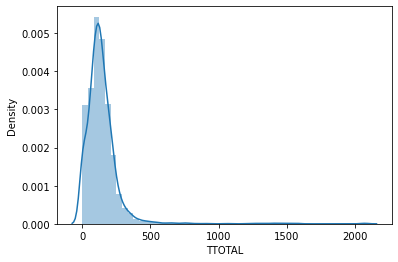

In [34]:
sns.distplot(dfclean['TTOTAL'])

<AxesSubplot:xlabel='TDESCARGATOTAL', ylabel='distancia'>

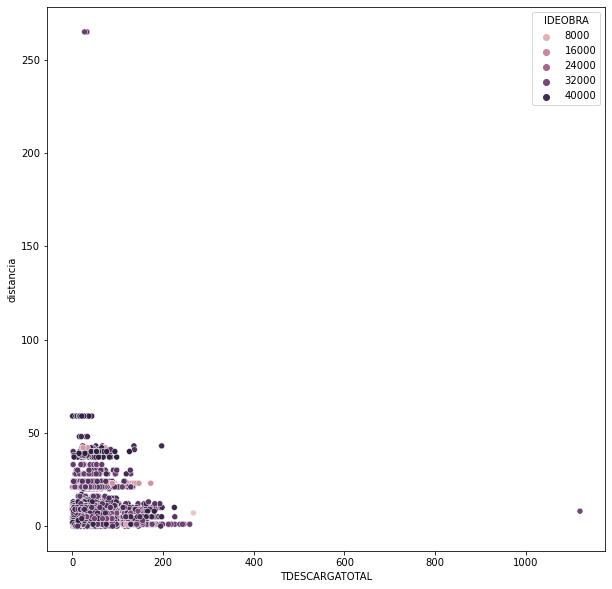

In [38]:
f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='TDESCARGATOTAL', y='dºistancia', hue='IDEOBRA', data=dfclean, ax=ax, )

C:\Users\rtruj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rtruj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rtruj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rtruj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rtruj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.7% of the points

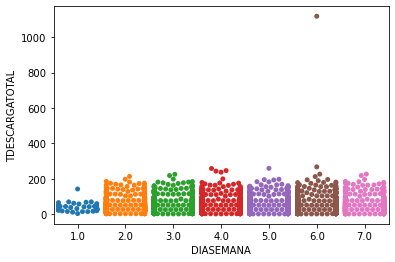

In [41]:
ax = sns.swarmplot(x="DIASEMANA", y="TDESCARGATOTAL", data=dfclean)

<AxesSubplot:xlabel='distancia', ylabel='TDESCARGATOTAL'>

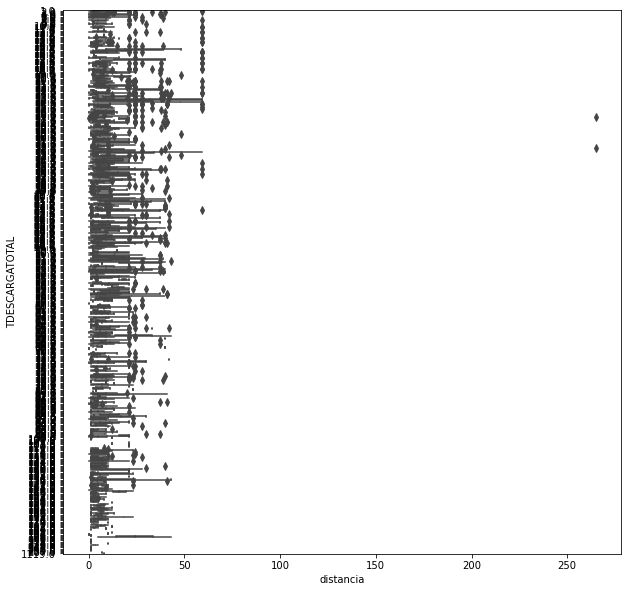

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y='TDESCARGATOTAL', x='distancia', data=dfclean, orient="h", ax=ax)

#Grafa para checar la linealidade entre las variables (distancia No Importa)
plt.scatter(dfclean['distancia'], dfclean['TDESCARGATOTAL'], color='red')
plt.title('Tiempo Descarga Vs Distancia', fontsize=14)
plt.xlabel('Distancia', fontsize=14)
plt.ylabel('Tiempo Descarga', fontsize=14)
plt.grid(True)
plt.show()

g =sns.scatterplot(x="distancia", y="TDESCARGATOTAL",
              hue="TTOTAL",
              data=dfclean);
g.set(xscale="log");

#Checando la linealidade entre 
plt.scatter(dfclean['FINSEMANA'], dfclean['TDESCARGATOTAL'], color='red')
plt.title('Tiempo Descarga Vs Fin Semana', fontsize=14)
plt.xlabel('FinSemana', fontsize=14)
plt.ylabel('TiempoDescarga', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(dfclean['WERKS'], dfclean['TDESCARGATOTAL'], color='red')
plt.title('Tiempo Descarga Vs Plantas', fontsize=14)
plt.xlabel('Plantas', fontsize=14)
plt.ylabel('Tiempo Descarga', fontsize=14)
plt.grid(True)
plt.show()